# Perceptron Algorithm from Scratch

## Ingredients

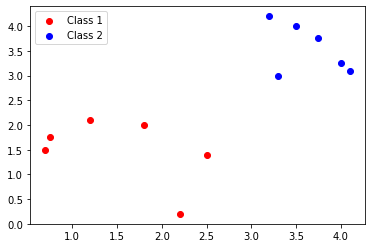

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Class 1 points
X1 = np.array([1.2, 0.7, 2.2, 0.75, 1.8, 2.5])
Y1 = np.array([2.1, 1.5, 0.2, 1.75, 2, 1.4])

X2 = np.array([3.2, 4.1, 3.75, 4, 3.3, 3.5])
Y2 = np.array([4.2, 3.1, 3.75, 3.25, 3, 4])

# plt.scatter(X1, Y1, c='r')
# plt.scatter(X2, Y2, c ='b')
# plt.show()

# Condensed version (X, Y, Class)
data = np.array([[1.2, 2.1, 1],
                [0.7, 1.5, 1],
                [2.2, 0.2, 1],
                [0.75, 1.75, 1],
                [1.8, 2, 1],
                [2.5, 1.4, 1],
                [3.2, 4.2, 2],
                [4.1, 3.1, 2],
                [3.75, 3.75, 2],
                [4, 3.25, 2],
                [3.3, 3, 2],
                [3.5, 4, 2]])

feature1 = data[:, 0]
feature2 = data[:, 1]
true_label = data[:, -1]

plt.scatter(feature1[true_label==1], feature2[true_label==1], c='r')
plt.scatter(feature1[true_label==2], feature2[true_label==2], c='b')
plt.legend(["Class 1", "Class 2"])
plt.show()

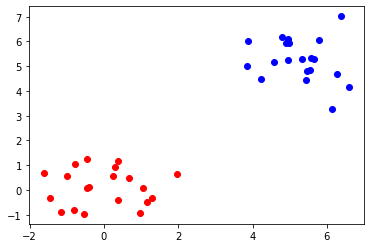

In [21]:
from numpy.random import normal
f1 = normal(size=20)
f2 = normal(size=20)

f3 = normal(loc=5, size=20)
f4 = normal(loc=5, size=20)

plt.scatter(f1, f2, c='r')
plt.scatter(f3, f4, c='b')

plt.show()

In [27]:
import random

def make_dataset(center1, center2, num_examples):
    dataset = list()
    
    f1 = normal(loc=center1, size=num_examples)
    f2 = normal(loc=center1, size=num_examples)

    f3 = normal(loc=center2, size=num_examples)
    f4 = normal(loc=center2, size=num_examples) 
    
    for i in range(num_examples):
        dataset.append([f1[i], f2[i], 0])
        dataset.append([f3[i], f4[i], 1])
        
    random.shuffle(dataset)
    return np.array(dataset)

In [34]:
myDataset = make_dataset(center1=0, center2=5, num_examples=50)

In [35]:
def plot_dataset(dataset):
    feature1 = dataset[:, 0]
    feature2 = dataset[:, 1]
    label = dataset[:, -1]
    
    plt.scatter(feature1[label==0], feature2[label==0], c='r')
    plt.scatter(feature1[label==1], feature2[label==1], c='b')
    plt.legend(["Class 1", "Class 2"])
    plt.show()

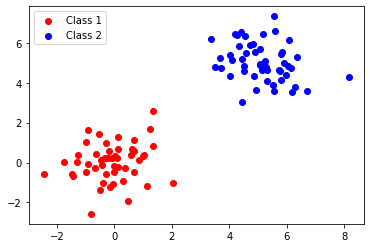

In [36]:
plot_dataset(myDataset)

## Equipment

In [6]:
def weighted_sum(weights, inputs):
    summation = 0
    
    for i in range(len(weights)):
        summation += weights[i] * inputs[i]
        
    return summation

def threshold(summation):
    if summation > 0:
        return 1
    else:
        return 0
    
# Combined perceptron activation
def activation(weights, bias, inputs):
    weighted_sum = sum([weights[i]*inputs[i] for i in range(len(weights))]) + bias
    return 1 if weighted_sum > 0 else 0

## Directions

In [18]:
# Training algorithm
def train(weights, bias, features, true_labels, lr = 1, epochs = 100):
    for _ in range(epochs):
        for i in range(len(weights)):
            pred = activation(weights, bias, features[i])
            
            for j in range(len(weights)):
                weights[j] += lr * (true_labels[i] - pred) * features[i][j]
            
            bias += lr * (true_labels[i] - pred)
            

trial_weights = np.random.rand(5)
bias = 0

features = [np.random.rand(5) for i in range(5)]
true_labels = [0, 1, 0, 1, 1]

print([activation(trial_weights, bias, features[i]) for i in range(5)])

train(trial_weights, bias, features, true_labels, 1, 1000)

print([activation(trial_weights, bias, features[i]) for i in range(5)])

[1, 1, 1, 1, 1]
[0, 1, 0, 1, 1]


# Complete Code 

Let us combine all the steps in the recipe into a single Perceptron class.

In [1]:
import numpy as np

class Perceptron:
    def __init__(self, num_features):
        self.weights = np.random.rand(num_features)
        self.bias = 0
        
    def activation(self, inputs):
        weighted_sum = 0
        for i in range(len(self.weights)):
            weighted_sum += self.weights[i] * inputs[i]
        weighted_sum += self.bias
        
        return 1 if weighted_sum > 0 else 0
    
    def train(self, features, labels, lr = 1, epochs = 100):
        for _ in range(epochs):
            for i in range(len(features)):
                y_hat = self.activation(features[i])

                for j in range(len(self.weights)):
                    self.weights[j] += lr * (labels[i] - y_hat) * features[i][j]

                self.bias += lr * (labels[i] - y_hat)

In [19]:
myPerceptron = Perceptron(5)
test = [np.random.rand(5) for i in range(5)]
labels = [0, 1, 0, 1, 1]

print([myPerceptron.activation(test[i]) for i in range(5)])
    
myPerceptron.train(test, labels)

print([myPerceptron.activation(test[i])for i in range(5)])

[1, 1, 1, 1, 1]
[0, 1, 0, 1, 1]
